In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
%matplotlib inline
pd.options.display.max_columns = 500
plt.style.use('ggplot')

In [135]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Exploratory Analysis

In [136]:
data = pd.read_csv('E-Bike_Survey_Responses.csv')
new_column_names = ['timestamp', 'age', 'sex', 'health', 'education', 'income', 'employment',
                    'district', 'daily_travel_distance', 'commute_time', 'transportation',
                    'vehicles', 'statements', 'trail_activity', 'speed_limit_aware',
                    'conflict', 'speeding_demand_action', 'ebike_multiuse_path', 'bicycle_lane',
                    'ebike_bicycle_lane', 'sidewalk', 'mobility_devices']

for old_name, new_name in zip(data.columns, new_column_names):
    printmd(f'**{new_name}**: {old_name}')

data.columns = new_column_names

**timestamp**: Timestamp

**age**: What age range do you fall in?

**sex**: Sex

**health**: How would you describe your level of physical health?

**education**: What level of education have you reached?

**income**: What is your household income?

**employment**: Which category best describes your employment?

**district**: What Toronto district is your primary address located in?

**daily_travel_distance**: On average what distance do you travel most days of the week?

**commute_time**: On average how long is your commute?

**transportation**: Which transportation option do you end up using most often?

**vehicles**: Does your household have access to any of the following private motorized vehicles?

**statements**: Do you support any of the following statements?

**trail_activity**: When you use Toronto's Multi-Use Trails do you mostly

**speed_limit_aware**: Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?

**conflict**: Have you witnessed a collision or conflict on a trail between

**speeding_demand_action**: Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?

**ebike_multiuse_path**: Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined 

**bicycle_lane**: When you use Toronto's bicycle lanes do you mostly

**ebike_bicycle_lane**: Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined 

**sidewalk**: With regards to illegal use of bicycles and e-bikes on sidewalks should the City 

**mobility_devices**: Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 22 columns):
timestamp                 2238 non-null object
age                       2234 non-null object
sex                       2221 non-null object
health                    2227 non-null object
education                 2220 non-null object
income                    2178 non-null object
employment                2223 non-null object
district                  2237 non-null object
daily_travel_distance     2237 non-null object
commute_time              2237 non-null object
transportation            2238 non-null object
vehicles                  2238 non-null object
statements                2238 non-null object
trail_activity            2238 non-null object
speed_limit_aware         2238 non-null object
conflict                  2238 non-null object
speeding_demand_action    2237 non-null object
ebike_multiuse_path       2238 non-null object
bicycle_lane              2238 non-null object


In [138]:
data.describe()

,timestamp,age,sex,health,education,income,employment,district,daily_travel_distance,commute_time,transportation,vehicles,statements,trail_activity,speed_limit_aware,conflict,speeding_demand_action,ebike_multiuse_path,bicycle_lane,ebike_bicycle_lane,sidewalk,mobility_devices
count,2238,2234,2221,2227,2220,2178,2223,2237,2237,2237,2238,2238,2238,2238,2238,2238,2237,2238,2238,2238,2238,2232
unique,1722,5,12,12,24,6,33,68,5,6,33,123,534,89,2,221,134,25,69,258,224,81
top,2013-04-12 10:23,35 to 49,Male,Very good,University degree,$100K+,Full Time,Central Toronto York or East York,5 - 10 km,16 - 29 minutes,bicycle,Yes - a car SUV truck or van,scooter style e-bikes are different than pedal...,cycle,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,ride a commuter or cruiser style bicycle,No changes are necessary to the existing bylaw,maintain the existing programs for signage edu...,Update the definition of a personal mobility d...
freq,7,863,1554,891,895,831,1405,1634,847,782,777,1146,84,738,1131,847,646,811,705,664,493,1379


In [139]:
data.head()

,timestamp,age,sex,health,education,income,employment,district,daily_travel_distance,commute_time,transportation,vehicles,statements,trail_activity,speed_limit_aware,conflict,speeding_demand_action,ebike_multiuse_path,bicycle_lane,ebike_bicycle_lane,sidewalk,mobility_devices
0,2013-04-10 12:10,35 to 49,Male,Good,Post graduate,$100K+,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,scooter type e-bike,Yes - a scooter style e-bike,On scooter type e-bikes the pedals are unneces...,drive a motor propelled e-bike,No,pedestrians and/or runners a conflict relating...,No - the trails are fine as they are,The bylaw should be modified to allow any kind...,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks
1,2013-04-10 12:30,18 to 34,Male,Excellent,University degree,$40K to $59K,Full Time,Central Toronto York or East York,10 - 20 km,30 - 44 minutes,scooter type e-bike,Yes - a scooter style e-bike,On scooter type e-bikes the pedals are unneces...,I very rarely use any of Toronto's Multi-Use P...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing
2,2013-04-10 12:33,50 to 64,Male,Good,University degree,$40K to $59K,Self Employed,Central Toronto York or East York,10 - 20 km,15 minutes or less,private motor vehicle (car truck SUV van motor...,Yes - a car SUV truck or van,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,Yes - more signage Yes - more enforcement (tic...,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase signage increase enforcement increase...,only wheelchairs at walking speed
3,2013-04-10 12:52,50 to 64,Male,Good,4 years university no degree,$80K to $99K,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,bicycle,Yes - a car SUV truck or van,On scooter type e-bikes the pedals are unneces...,cycle,No,a conflict between cyclists and pedestrians a ...,Yes - more signage Yes - more enforcement (tic...,Motorized vehicles should generally not be all...,ride a commuter or cruiser style bicycle,Motorized vehicles should generally not be all...,increase signage increase enforcement,Update the definition of a personal mobility d...
4,2013-04-10 13:24,18 to 34,Male,Very good,College or trade school diploma,$40K to $59K,Self Employed,Central Toronto York or East York,5 - 10 km,15 minutes or less,bicycle,Yes - a car SUV truck or van,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,Motorized vehicles should generally not be all...,ride a road bicycle or a fixie,Motorized vehicles should generally not be all...,maintain the existing programs for signage edu...,Update the definition of a personal mobility d...


**timestamp** column can be dropped since they should not influence whether someone owns private motorized vehicles

In [140]:
data = data.drop(['timestamp'], axis=1)

## Label column: Vehicles column

In [141]:
data['vehicles'].value_counts()

Yes - a car SUV truck or van                                                                                                                                         1146
No - I do not have access to a private motorized vehicle                                                                                                              522
Yes a motorcycle                                                                                                                                                      162
Yes - a pedal assist type e-bike                                                                                                                                       99
Yes - a scooter style e-bike                                                                                                                                           85
Yes - a car SUV truck or van Yes a motorcycle                                                                                                         

We will convert the **vehicles** column to a binary column. Any value that contains the substring "No - I do not have access to a private motorized vehicle" will be a no, and any other value is a yes.

In [142]:
data['vehicles'] = (~data['vehicles'].str.contains('No - I do not have access to a private motorized vehicle')).astype(int)

In [143]:
data['vehicles'].value_counts()

1    1712
0     526
Name: vehicles, dtype: int64

## age

Let's us look at the effect of age on whether someone owns a vehicle or not.

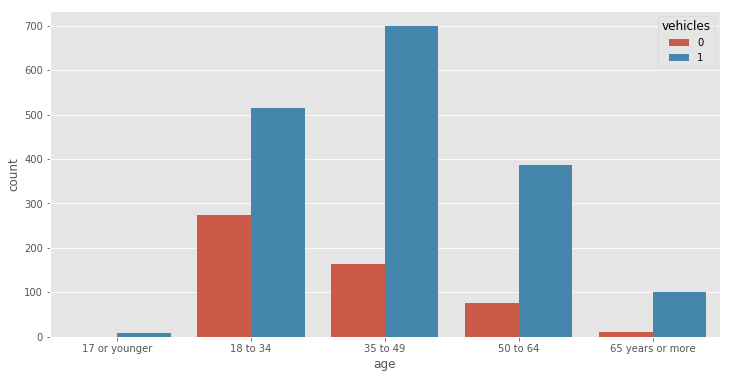

In [144]:
data.dropna(subset=['age'], inplace=True)
plt.figure(figsize = (12, 6))
ax = sns.countplot(x='age', hue='vehicles', data=data, order=sorted(data['age'].value_counts().keys()))

It seems young adults (18 - 34) are less likely to own vehicles.

##  sex

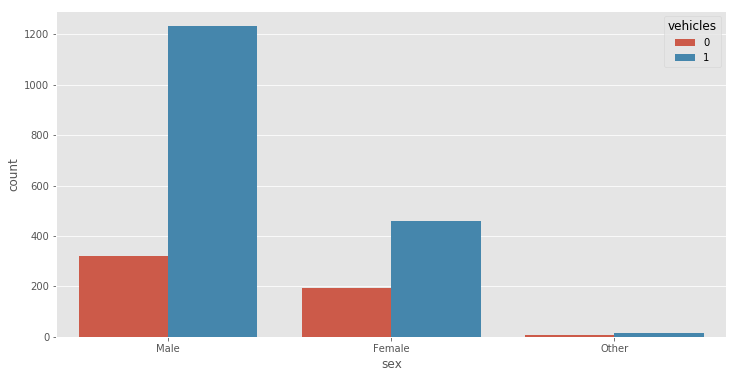

In [145]:
data['sex'] = data['sex'].map(lambda s: s if s in ('Male', 'Female') else 'Other')
plt.figure(figsize = (12, 6))
ax = sns.countplot(x='sex', hue='vehicles', data=data)

Seems females are more likely to not own vehicles.

## health

In [146]:
data['health'].value_counts(dropna=False)

Very good                                    890
Good                                         667
Excellent                                    411
Fairly good                                  210
Poor                                          41
NaN                                            8
Disabled                                       1
Back Injury                                    1
Obese diabetic but trying to be healthy        1
healing fractured heel                         1
healthy but with arthritis mobilty issues      1
In poor shape but active & improving           1
need knee replacement                          1
Name: health, dtype: int64

We have 5 values we want to use: poor, fairly good, good, very good, excellent. If NaN, we use the middle value good instead. The other categories that are not very good, good, excellent, fairly good, or poor seem to be poor, so we'll convert those values to poor. We'll also assign a graded numerical value to indicate various levels of health rather than treating this as categorical.

In [147]:
data['health'] = data['health'].map(lambda h: h if isinstance(h, str) else 'Good')

In [148]:
data['health'] = data['health'].map(lambda h: h if h in ('Very good', 'Good', 'Excellent', 'Fairly good', 'Poor') else 'Poor')

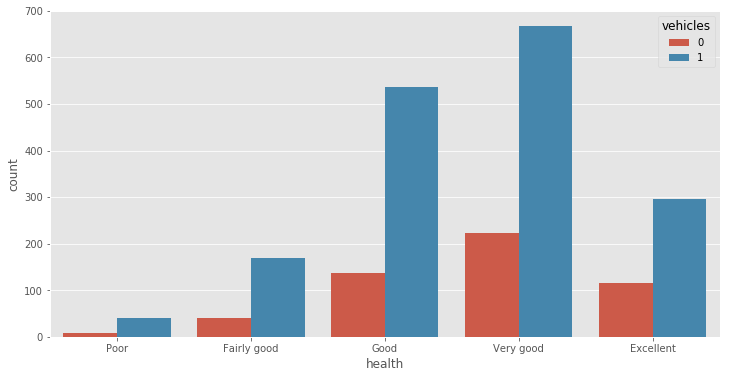

In [149]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x='health', hue='vehicles', data=data, order=['Poor', 'Fairly good', 'Good', 'Very good', 'Excellent'])

In [150]:
data['health'] = data['health'].map({'Poor': 1, 'Fairly good': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5})

## education

In [151]:
data['education'].value_counts(dropna=False)

University degree                                    895
Post graduate                                        591
College or trade school diploma                      521
High school diploma                                  192
NaN                                                   14
Some university                                        2
University Student                                     1
M D                                                    1
Some University                                        1
some university                                        1
working towards OSSD                                   1
Professional degree                                    1
4 years university no degree                           1
college degree (not university and not a diploma)      1
some uni                                               1
in HS                                                  1
High school Student                                    1
Law School                     

In [152]:
def clean_education(s):
    if not isinstance(s, str):
        return np.nan
    s = s.lower()
    if 'university' in s:
        return 'university'
    
    if 'graduate' in s or 'm d' in s or 'phd' in s or 'law' in s:
        return 'graduate'

    if 'college or trade school diploma' in s or 'professional' in s:
        return 'trade'
    
    if 'high school diploma' in s or 'in hs' in s or 'ossd' in s or 'grade' in s:
        return 'high_school'

data['education'] = data['education'].map(clean_education)

Look at the NaN values

In [153]:
data[pd.isnull(data['education'])]

,age,sex,health,education,income,employment,district,daily_travel_distance,commute_time,transportation,vehicles,statements,trail_activity,speed_limit_aware,conflict,speeding_demand_action,ebike_multiuse_path,bicycle_lane,ebike_bicycle_lane,sidewalk,mobility_devices
232,35 to 49,Male,2,NaN,$100K+,Full Time,Central Toronto York or East York,Over 35 km,30 - 44 minutes,private motor vehicle (car truck SUV van motor...,1,scooter style e-bikes are different than pedal...,walk with a stroller young child or pet,No,a conflict between two cyclists a conflict bet...,Yes - more signage,The bylaw should be modified to allow the 'ped...,ride a commuter or cruiser style bicycle,The bylaw should be modified to allow all kind...,increase signage increase enforcement increase...,Update the definition of a personal mobility d...
245,35 to 49,Male,3,NaN,NaN,Full Time,Central Toronto York or East York,20 -35 km,30 - 44 minutes,bicycle,1,scooter style e-bikes are different than pedal...,cycle,No,a conflict relating to a dog(s),No - the trails are fine as they are,The bylaw should be modified to allow the 'ped...,ride a commuter or cruiser style bicycle,The bylaw should be modified to allow 'pedal a...,maintain the existing programs for signage edu...,Institute a speed limit for sidewalks
491,35 to 49,Male,4,NaN,$80K to $99K,Full Time,Central Toronto York or East York,Over 35 km,over 1 hour each way,private motor vehicle (car truck SUV van motor...,1,On scooter type e-bikes the pedals are unneces...,walk with a stroller young child or pet,No,a conflict between cyclists and pedestrians a ...,Yes - more enforcement (ticketing),No changes are necessary to the existing bylaw,ride a mountain downhill or BMX bicycle,No changes are necessary to the existing bylaw,increase enforcement,Update the definition of a personal mobility d...
805,35 to 49,Other,3,NaN,Under $20K,Self Employed,Central Toronto York or East York,Over 35 km,15 minutes or less,private motor vehicle (car truck SUV van motor...,1,scooter style e-bikes are different than pedal...,walk walk with a stroller young child or pet r...,Yes,pedestrians and/or runners a conflict relating...,No - the trails are fine as they are,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase enforcement,Update the definition of a personal mobility d...
877,35 to 49,Female,4,NaN,NaN,Full Time,Central Toronto York or East York,5 - 10 km,16 - 29 minutes,bicycle,0,E-bikes should require a license,cycle,Yes,pedestrians and/or runners a conflict relating...,No - the trails are fine as they are,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,E-bikes should NOT be allowed in bike lanes Le...,increase enforcement,Don't Know / Rather Not Answer
887,18 to 34,Male,4,NaN,NaN,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,walking,0,scooter style e-bikes are different than pedal...,walk cycle,Yes,pedestrians and/or runners a conflict relating...,Yes - more signage Yes - more educational prog...,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase enforcement increase education,Update the definition of a personal mobility d...
1058,50 to 64,Female,2,NaN,$100K+,Full Time,Central Toronto York or East York,20 -35 km,16 - 29 minutes,scooter type e-bike,1,On scooter type e-bikes the pedals are unneces...,walk,Yes,a conflict relating to a dog(s) a conflict bet...,Yes - more signage Yes - more enforcement (tic...,The bylaw should be modified to allow any kind...,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,increase enforcement,Update the definition of a personal mobility d...
1197,50 to 64,Male,1,NaN,NaN,Self Employed,Central Toronto York or East York,10 - 20 km,16 - 29 minutes,private motor vehicle (car truck SUV van motor...,1,Most scooter type e-bikes are wid

It is quite hard to infer education if both education and income columns are NaNs. We should drop these rows.

In [154]:
data.dropna(how='all', subset=['education', 'income'], inplace=True)

In [155]:
def clean_education_nan(row):
    if isinstance(row.education, str):
        return row.education
    
    if '17 or younger' in row.age or 'Under $20K' in row.income:
        return 'high_school'
    
    return 'university'

data['education'] = data.apply(clean_education_nan, axis=1)

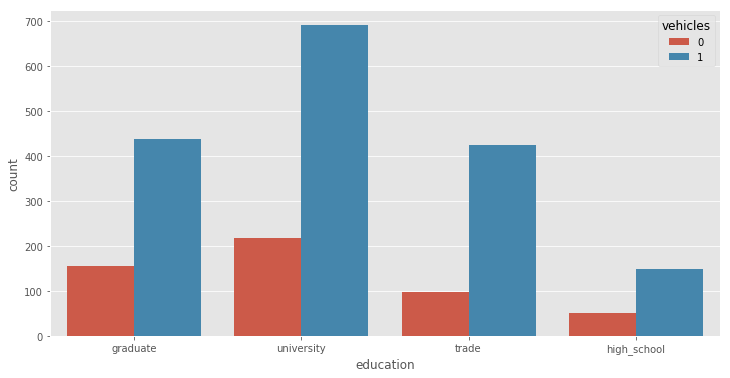

In [156]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x='education', hue='vehicles', data=data)

In [157]:
data['education'] = data['education'].map({'high_school': 1, 'trade': 2, 'university': 3, 'graduate': 4})

## income

In [158]:
data['income'].value_counts(dropna=False)

$100K+          831
$60K to $79K    372
$80K to $99K    335
$40K to $59K    298
$20K to $39K    235
Under $20K      107
NaN              49
Name: income, dtype: int64

In [159]:
data['income'] = data['income'].map({'Under $20K': 1, '$20K to $39K': 2, '$40K to $59K': 3, '$60K to $79K': 4, '$80K to $99K': 5, '$100K+': 6})

For NaNs, we estimate the income based on education level.

In [160]:
for l in range(1, 5):
    print(f'Education level: {l}')
    print(data[data['education'] == l]['income'].median())

Education level: 1
4.0
Education level: 2
4.0
Education level: 3
5.0
Education level: 4
6.0


In [161]:
def clean_income_nan(row):
    if not np.isnan(row.income):
        return row.income
    
    if row.education in (1.0, 2.0):
        return 4
    
    if row.education == 3.0:
        return 5
    
    if row.education == 4.0:
        return 6

data['income'] = data.apply(clean_income_nan, axis=1)

## employment

In [162]:
data['employment'].value_counts(dropna=False)

Full Time                                                                                                                            1403
Self Employed                                                                                                                         359
Retired                                                                                                                               135
Part Time                                                                                                                             121
Student                                                                                                                               118
Unemployed                                                                                                                             37
Home Maker                                                                                                                             17
NaN                               

In [163]:
def clean_employment(e):
    if not isinstance(e, str):
        return 'other'
    
    e = e.lower()
    
    if 'full' in e:
        return 'full_time'
    
    if 'self' in e:
        return 'self_employed'
    
    if 'retired' in e:
        return 'retired'
    
    if 'part' in e or 'contract' in e or 'free' in e:
        return 'part_time'
    
    if 'student' in e:
        return 'student'
    
    if 'unemployed' in e:
        return 'unemployed'
    
    if 'dis' in e or 'odsp' in e:
        return 'disabled'
    
    if 'home' in e:
        return 'home'
    
    return 'other'

data['employment'] = data['employment'].map(clean_employment)

## district

In [164]:
data['district'].value_counts()

Central Toronto York or East York                                                1624
Etobicoke                                                                         236
North York                                                                        129
Scarborough                                                                       120
Mississauga                                                                        24
Brampton                                                                            9
Pickering                                                                           4
Waterloo                                                                            4
Oakville                                                                            3
Guelph                                                                              3
Richmond Hill                                                                       3
oshawa                                                

In [165]:
data['district'] = data['district'].map(lambda d: d if d in ('Central Toronto York or East York', 'Etobicoke', 'North York', 'Scarborough', 'Mississauga', 'Other') else 'Other District')

## daily_travel_distance and commute_time

Intuitively these should be important for deciding whether someone owns motorized vehicle.

In [166]:
data['daily_travel_distance'].value_counts()

5 - 10 km     845
10 - 20 km    650
Over 35 km    293
20 -35 km     245
Under 2 km    194
Name: daily_travel_distance, dtype: int64

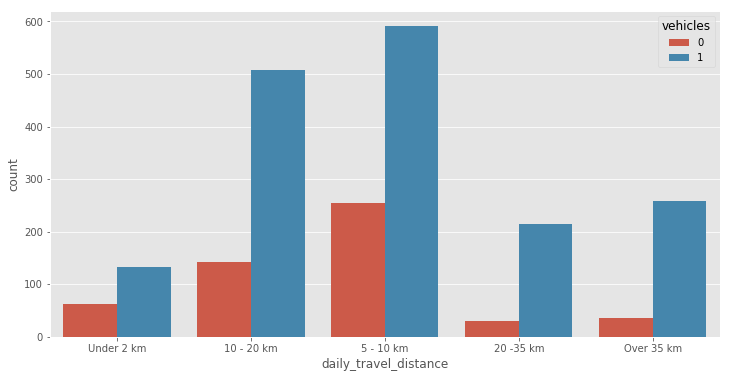

In [167]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x='daily_travel_distance', hue='vehicles', data=data)

As expected, long travel distance (>20 km) seems to have more people having vehicles.

In [168]:
data['daily_travel_distance'] = data['daily_travel_distance'].map({'Under 2 km': 1, '5 - 10 km': 2, '10 - 20 km': 3, '20 -35 km': 4, 'Over 35 km': 5})

In [169]:
data['commute_time'].value_counts()

16 - 29 minutes         776
30 - 44 minutes         563
15 minutes or less      374
45 minutes - 1 hour     246
I do not commute        166
over 1 hour each way    102
Name: commute_time, dtype: int64

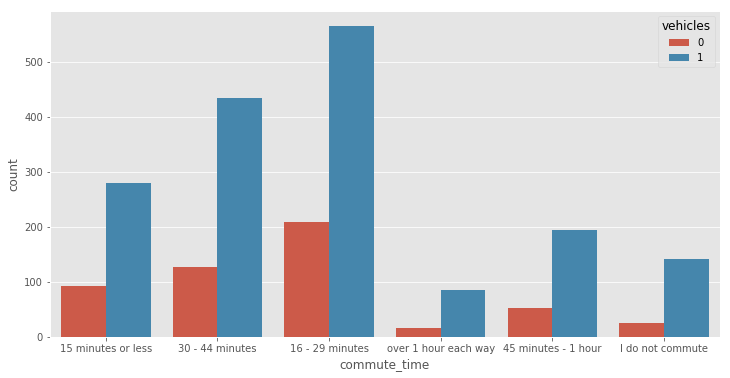

In [170]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x='commute_time', hue='vehicles', data=data)

In [171]:
data['commute_time'] = data['commute_time'].map({'I do not commute': 1, '15 minutes or less': 2, '16 - 29 minutes': 3, '30 - 44 minutes': 4, '45 minutes - 1 hour': 5, 'over 1 hour each way': 6})

## transportation

In [172]:
data['transportation'].value_counts()

bicycle                                                                                       775
private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)    627
transit                                                                                       363
walking                                                                                       245
scooter type e-bike                                                                           104
pedal assist type e-bike                                                                       86
personal mobility device (electric wheelchair)                                                  2
Car in winter bicycle in summer                                                                 1
taxi                                                                                            1
5000W custom high power electric bicycle (non-scooter)                                          1
transit or bicycle (

In [173]:
def clean_transit(t):
    t = t.lower()
    
    if 'bicycle' in t:
        return 'bicycle'
    
    if 'private motor vehicle' in t or 'motorcycle' in t or 'car' in t:
        return 'private_motor'
    
    if t.startswith('transit') or 'shuttle' in t:
        return 'transit'
    
    if 'walking' in t or 'running' in t:
        return 'walking'
    
    if 'scooter type e-bike' in t or 'motor scooter' in t:
        return 'scooter'
    
    if 'pedal assist type e-bike' in t or 'e-bike' in t:
        return 'pedal'
    
    if 'personal mobility device' in t:
        return 'personal_mobility'
    
    if 'bike' in t or 'cycling' in t or 'roller' in t or 'skate' in t:
        return 'bicycle'
    
    return 'private_motor'

data['transportation'] = data['transportation'].map(clean_transit)

## statements

In [174]:
statements = [
    'scooter style e-bikes are different than pedal assisted bicycle type e-bikes and should not be considered as one vehicle category',
    'On scooter type e-bikes the pedals are unnecessary and should not be required',
    'E-bikes are a green transportation option which should be encouraged',
    'Most scooter type e-bikes are wider than a bicycle',
    'Most scooter type e-bikes weigh more than an average bicycle',
    'Most e-bikes are able to travel further distances than an average cyclist of average fitness',
    'Most e-bikes are able to sustain higher average speeds than an average cyclist of average fitness',
    'Most e-bikes are able to accelerate more quickly than an average cyclist of average fitness',
    'E-bikes should require a license',
    'E-bikes should be required to have insurance',
    'E-bikes should be allowed to carry a passenger'
]

def clean_statements(row):
    for i, statement in enumerate(statements):
        row[f's{i}'] = int(statement in row.statements)
    return row

data = data.apply(clean_statements, axis=1).drop(['statements'], axis=1)

## trail_activity

In [175]:
data['trail_activity'].value_counts()

cycle                                                                                                                                    736
walk cycle                                                                                                                               280
walk                                                                                                                                     265
I very rarely use any of Toronto's Multi-Use Paths                                                                                       196
walk run cycle                                                                                                                            93
pedal a pedal assist type e-bike                                                                                                          67
walk with a stroller young child or pet                                                                                                   66
run          

In [176]:
activities = [
    'cycle',
    'walk',
    'run',
    'skate',
    "I very rarely use any of Toronto's Multi-Use Paths",
    'pedal a pedal assist type e-bike',
    'walk with a stroller young child or pet',
    'drive a motor propelled e-bike'
]

def clean_activities(row):
    for i, activity in enumerate(activities):
        row[f'a{i}'] = int(activity in row.trail_activity)
    return row

data = data.apply(clean_activities, axis=1).drop(['trail_activity'], axis=1)

## speed_limit_aware

In [177]:
data['speed_limit_aware'] = (data['speed_limit_aware'] == 'Yes').astype('int')

## conflict

In [178]:
data['conflict'].value_counts()

I am not aware of any conflicts on the trails                                                                                                                                                                                                                                                              843
a conflict between cyclists and pedestrians                                                                                                                                                                                                                                                                138
a conflict between an e-biker and a pedestrian a conflict between e-biker and a cyclist                                                                                                                                                                                                                     80
a conflict relating to a dog(s)                                                            

In [179]:
conflicts = [
    'I am not aware of any conflicts on the trails',
    'a conflict between cyclists and pedestrians',
    'a conflict between an e-biker and a pedestrian',
    'a conflict between e-biker and a cyclist',
    'a conflict relating to a dog(s) a conflict between cyclists and pedestrians',
    'a conflict between two cyclists',
    'a conflict relating to an in-line skater'
]

def clean_conflicts(row):
    for i, conflict in enumerate(conflicts):
        row[f'c{i}'] = int(conflict in row.conflict)
    return row

data = data.apply(clean_conflicts, axis=1).drop(['conflict'], axis=1)

## speeding_demand_action

In [180]:
data['speeding_demand_action'].value_counts()

No - the trails are fine as they are                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             643
Yes - more signage Yes - more enforcement (ticketing) Yes - more educational programs                                                                                                                                                                                                                                                                                                                                                                                                              

In [181]:
def clean_speeding_demand_action(row):
    if isinstance(row.speeding_demand_action, float) or row.speeding_demand_action.startswith('No') or row.speeding_demand_action.startswith('no'):
        row['speeding_action'] = 0
    else:
        row['speeding_action'] = 1
    return row

data = data.apply(clean_speeding_demand_action, axis=1).drop(['speeding_demand_action'], axis=1)

## eboke_multiuse_path

In [182]:
data['ebike_multiuse_path'].value_counts()

No changes are necessary to the existing bylaw                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            806
Motorized vehicles should generally not be allowed on the trail but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone                                                                                                                                                                                                                                                              

In [183]:
ebike_multiuse_values = [
    'No changes are necessary to the existing bylaw',
    'Motorized vehicles should generally not be allowed on the trail but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone',
    "The bylaw should be modified to allow the 'pedal assist bicycle' type of e-bikes",
    'The bylaw should be modified to allow any kind of e-bike including scooter type e-bikes use the trail',
    'The bylaw should be rescinded so that any kind of recreational motor vehicle can drive on the trail'
]

def clean_ebike_multiuse(row):
    for i, statement in enumerate(ebike_multiuse_values):
        row[f'm{i}'] = int(statement in row.ebike_multiuse_path)
    return row

data = data.apply(clean_ebike_multiuse, axis=1).drop(['ebike_multiuse_path'], axis=1)

## bicycle_lane

In [184]:
data['bicycle_lane'].value_counts()

ride a commuter or cruiser style bicycle                                                                                                                                                                                                             703
ride a road bicycle or a fixie                                                                                                                                                                                                                       571
ride a mountain downhill or BMX bicycle                                                                                                                                                                                                              346
I do not use bicycle lanes                                                                                                                                                                                                                           285
peda

In [185]:
def clean_bicycle_lane(row):
    row[f'b_motor'] = int('motor' in row.bicycle_lane.lower())
    row[f'b_do_not_use'] = int(row.bicycle_lane == 'I do not use bicycle lanes')
    row[f'b_bike_other'] = int(not bool(row[f'b_motor']) and not bool(row[f'b_do_not_use']))
    return row

data = data.apply(clean_bicycle_lane, axis=1).drop(['bicycle_lane'], axis=1)

## ebike_bicycle_lane

In [186]:
data['ebike_bicycle_lane'].value_counts()

No changes are necessary to the existing bylaw                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     662
Motorized vehicles should generally not be allowed in bicycle lanes but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone                                                                                                                                 

In [187]:
ebike_bicycle_values = [
    'No changes are necessary to the existing bylaw',
    'Motorized vehicles should generally not be allowed in bicycle lanes but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone',
    "The bylaw should be modified to allow 'pedal assist' type e-bikes to pedal but get a battery boost",
    'The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling but there should be some restrictions (eg width weight speed)',
    'The bylaw should be modified to allow e-bikes to drive in bicycle lanes using their motors and not pedalling without any restrictions set in place by the City (eg width weight speed)',
    'The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas but not in busy downtown bicycle lanes'
]

def clean_ebike_bicycle_lane(row):
    for i, statement in enumerate(ebike_bicycle_values):
        row[f'eb{i}'] = int(statement in row.ebike_bicycle_lane)
    return row

data = data.apply(clean_ebike_bicycle_lane, axis=1).drop(['ebike_bicycle_lane'], axis=1)

## sidewalk

In [188]:
data['sidewalk'].value_counts()

maintain the existing programs for signage education and enforcement                                                                                                                                                                                                                                                                                                                                                                                                           492
increase signage increase enforcement increase education                                                                                                                                                                                                                                                                                                                                                                                                                       346
increase enforcement                                              

In [189]:
sidewalk_values = [
    'maintain the existing programs for signage education and enforcement',
    'increase signage',
    'increase enforcement',
    'increase education'
]

def clean_sidewalk(row):
    for i, statement in enumerate(sidewalk_values):
        row[f'si{i}'] = int(statement in row.sidewalk)
    return row

data = data.apply(clean_sidewalk, axis=1).drop(['sidewalk'], axis=1)

## mobility_devices

In [190]:
data['mobility_devices'].value_counts()

Update the definition of a personal mobility device so that they must travel at speeds close to walking speed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [191]:
mobility_devices_values = [
    'Update the definition of a personal mobility device so that they must travel at speeds close to walking speed',
    'Institute a speed limit for sidewalks',
    'Do nothing',
    "Don't Know / Rather Not Answer"
]

def clean_mobility_devices(row):
    for i, statement in enumerate(mobility_devices_values):
        if isinstance(row.mobility_devices, float):
            row[f'mo{i}'] = 0
        else:
            row[f'mo{i}'] = int(statement in row.mobility_devices)
    return row

data = data.apply(clean_mobility_devices, axis=1).drop(['mobility_devices'], axis=1)

In [192]:
data.head()

,age,sex,health,education,income,employment,district,daily_travel_distance,commute_time,transportation,vehicles,speed_limit_aware,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,a0,a1,a2,a3,a4,a5,a6,a7,c0,c1,c2,c3,c4,c5,c6,speeding_action,m0,m1,m2,m3,m4,b_motor,b_do_not_use,b_bike_other,eb0,eb1,eb2,eb3,eb4,eb5,si0,si1,si2,si3,mo0,mo1,mo2,mo3
0,35 to 49,Male,3,4,6.0,self_employed,Central Toronto York or East York,1,2,scooter,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1,18 to 34,Male,5,3,3.0,full_time,Central Toronto York or East York,3,4,scooter,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0
2,50 to 64,Male,3,3,3.0,self_employed,Central Toronto York or East York,3,2,private_motor,1,0,0,0,0,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0
3,50 to 64,Male,3,3,5.0,self_employed,Central Toronto York or East York,1,2,bicycle,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
4,18 to 34,Male,4,2,3.0,self_employed,Central Toronto York or East York,2,2,bicycle,1,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0


## Final Data Processing

Finally, we will convert the columns that are not yet one-hot-encoded to one-hot encoding.

In [193]:
data = pd.get_dummies(data, columns=['age', 'sex', 'employment', 'district', 'transportation'])

Just checking that data is clean and has no missing information:

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2237
Data columns (total 86 columns):
health                                        2227 non-null int64
education                                     2227 non-null int64
income                                        2227 non-null float64
daily_travel_distance                         2227 non-null int64
commute_time                                  2227 non-null int64
vehicles                                      2227 non-null int64
speed_limit_aware                             2227 non-null int64
s0                                            2227 non-null int64
s1                                            2227 non-null int64
s2                                            2227 non-null int64
s3                                            2227 non-null int64
s4                                            2227 non-null int64
s5                                            2227 non-null int64
s6                               

Save the data for processing and model training.

In [195]:
data.to_csv('ebike_survey_responses_processed.csv', index=False)